# Load some CESM Models

In [1]:
import sys
sys.path.append(sys.path[0]+'/../..')


In [2]:
import helpers.fileHandler as fh

In [3]:
#Negative Case. Try bad model names
try:
    fh.loadModelData('CESM-LM','SST', '001')
except:
    print("Test passed - bad model name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad model name")
    
try:
    fh.loadModelData('CESM-LMEF','SST', '001')
except:
    print("Test passed - bad model name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad model name")


The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Test passed - bad model name rejected
Test passed - bad model name rejected


In [4]:
#Negative Case. Try bad variable names
try:
    fh.loadModelData('CESM-LME','SS', '001')
except:
    print("Test passed - bad variable name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad variable name")
    
try:
    fh.loadModelData('CESM-LME','SSTF', '001')
except:
    print("Test passed - bad variable name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad variable name")

Test passed - bad variable name rejected
Test passed - bad variable name rejected


In [5]:
#Negative Case. Try bad test names
try:
    fh.loadModelData('CESM-LME','SST', '014')
except:
    print("Test passed - bad test name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad test name")
    
try:
    fh.loadModelData('CESM-LME','SST', '0')
except:
    print("Test passed - bad test name rejected")
else:
    raise RuntimeError ("Test failed, function accepted bad test name")

Test passed - bad test name rejected
Test passed - bad test name rejected


# Try some things that should work

This is a normal ensemble run

In [6]:
fh.loadModelData('CESM-LME','SST', '013')

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 13872, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 0850-01-31 00:00:00 ... 2005-12-31 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                    ...
    stefan_boltzmann      (time) float64 5.67e-08 5.67e-08 ... 5.67e-08 5.67e-08
    time_bound            (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    transport_components  (time, transport_comp) |S256 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions     (time, transport_reg) |S256 dask.array<chunksize=(600, 2), meta=np.ndarray>
    vonkar                (time) float64 0.4 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4 0.4
    SST                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           b.e11.BLMTRC5CN.f19_g16.013
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.4.2
    history:         Fri Jan 29 13:34:28 2016: ncrename -v TEMP,SST b.e11.BLM...

This is a control run

In [7]:
testData=fh.loadModelData('CESM-LME','SST', '850forcing.003')
testData

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 13872, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 0850-01-31 00:00:00 ... 2005-12-31 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                    ...
    stefan_boltzmann      (time) float64 5.67e-08 5.67e-08 ... 5.67e-08 5.67e-08
    time_bound            (time, d2) object dask.array<chunksize=(600, 2), meta=np.ndarray>
    transport_components  (time, transport_comp) |S256 dask.array<chunksize=(600, 5), meta=np.ndarray>
    transport_regions     (time, transport_reg) |S256 dask.array<chunksize=(600, 2), meta=np.ndarray>
    vonkar                (time) float64 0.4 0.4 0.4 0.4 0.4 ... 0.4 0.4 0.4 0.4
    SST                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           b.e11.BLMTRC5CN.f19_g16.850forcing.003
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.4.2
    history:         Thu Jun  4 12:54:50 2015: ncrename -v TEMP,SST b.e11.BLM...

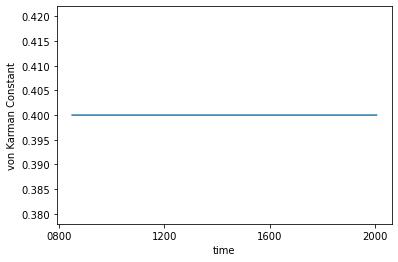

In [8]:
testData.vonkar.plot()

This is a validation output from NCAR

In [9]:
testData=fh.loadModelData('CESM-LME','cvdp_data', 'ORBITAL\.003')
testData

<xarray.Dataset>
Dimensions:                         (LAT: 96, LON: 144, TIME: 1156, frequency: 6936, frequency2: 578, lat: 96, lat_amoc: 395, lev: 61, lon: 144, longitude: 65, ncurves: 4, period: 166, time: 13872, time_lag_cor: 31, time_mon1: 29, time_mon2: 12, time_mon3: 49)
Coordinates: (12/17)
  * LAT                             (LAT) float32 -90.0 -88.11 ... 88.11 90.0
  * LON                             (LON) float32 0.0 2.5 5.0 ... 355.0 357.5
  * TIME                            (TIME) int32 850 851 852 ... 2003 2004 2005
  * frequency                       (frequency) float32 7.209e-05 ... 0.5
  * frequency2                      (frequency2) float32 0.0008651 ... 0.5
  * lat                             (lat) float64 -90.0 -88.11 ... 88.11 90.0
    ...                              ...
  * period                          (period) float32 0.08609 ... 1.186e+03
  * time                            (time) object 0850-01-31 00:00:00 ... 200...
  * time_lag_cor                    (time_lag_cor) int32 -15 -14 -13 ... 14 15
  * time_mon1                       (time_mon1) int32 0 1 2 3 4 ... 25 26 27 28
  * time_mon2                       (time_mon2) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * time_mon3                       (time_mon3) int32 0 1 2 3 4 ... 45 46 47 48
Data variables: (12/347)
    amo_pattern_lowpass_mon         (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pattern_mon                 (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pr_regression_lowpass_mon   (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pr_regression_mon           (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_spectra                     (ncurves, frequency) float32 dask.array<chunksize=(4, 6936), meta=np.ndarray>
    amo_tas_regression_lowpass_mon  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    ...                              ...
    tas_trends_djf                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_jja                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_mam                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_mon                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_son                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tropical_indian_ocean           (time) float32 dask.array<chunksize=(13872,), meta=np.ndarray>
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    notes:        Data from b.e11.BLMTRC5CN.f19_g16.ORBITAL.003 from 850-2005
    climatology:  850-2005 climatology removed prior to all calculations (oth...
    Conventions:  CF-1.6
    history:      Sun Oct 27 16:45:37 2019: ncks -O /project/diagnostics/exte...
    NCO:          "4.5.2"

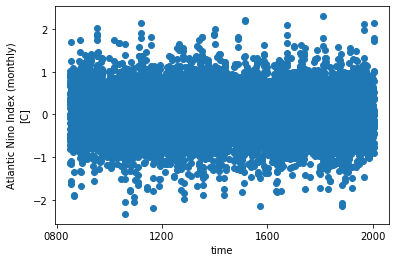

In [10]:
testData.plot.scatter('time', 'atlantic_nino')

This is a future result with RCP85

In [11]:
testData=fh.loadModelData('CESM-LME', 'PSL', 'LME.002')

In [12]:
testData

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 96, lev: 30, lon: 144, nbnd: 2, slat: 95, slon: 144, time: 1140)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2006-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * slat          (slat) float64 -89.05 -87.16 -85.26 ... 85.26 87.16 89.05
  * slon          (slon) float64 -1.25 1.25 3.75 6.25 ... 351.2 353.8 356.2
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hyai          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    P0            float64 ...
    date          (time) int32 dask.array<chunksize=(1140,), meta=np.ndarray>
    ...            ...
    n2ovmr        (time) float64 dask.array<chunksize=(1140,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(1140,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(1140,), meta=np.ndarray>
    sol_tsi       (time) float64 dask.array<chunksize=(1140,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(1140,), meta=np.ndarray>
    PSL           (time, lat, lon) float32 dask.array<chunksize=(1140, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.BRCP85C5CN.f19_g16.LME.002
    title:            UNSET
    logname:          mai
    host:             ys0616
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     b.e11.BLMTRC5CN.f19_g16.002.cam.i.2006-01-01-00000.nc
    topography_file:  /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/consisten...

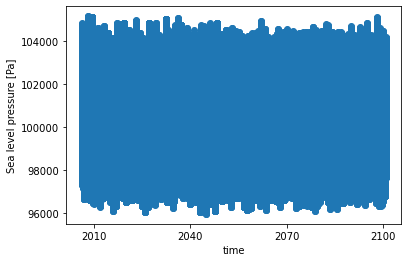

In [13]:
testData.plot.scatter(x='time',y='PSL')